**TCP packet delay considering all variance flavors**

**Read json files**

In [1]:
import json
import numpy as np
#Read reno delay json file
with open("data/reno_delay.json", 'r') as reno_file:
    reno_data = json.load(reno_file)
    
intervals = reno_data['intervals']
rtt_reno =[]
var_reno = []
cwnd_reno =[]


for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_reno.append(rtt)
    cwnd_reno.append(window_size/1000000)
    var_reno.append(rtt_variance)
    
#print(rtt_reno)
#print(cwnd_reno)
#print(var_reno)

In [2]:
#Read cubic delay json file
with open("data/cubic_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)
    
intervals = cubic_data['intervals']
rtt_cubic =[]
var_cubic = []
cwnd_cubic =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_cubic.append(rtt)
    cwnd_cubic.append(window_size/1000000)
    var_cubic.append(rtt_variance)
    
#print(rtt_cubic)
#print(cwnd_cubic)
#print(var_cubic)

In [3]:
#Read vegas delay json file
with open("data/vegas_delay.json", 'r') as vegas_file:
    vegas_data = json.load(vegas_file)
    
intervals = vegas_data['intervals']
rtt_vegas =[]
cwnd_vegas =[]
var_vegas = []

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_vegas.append(rtt)
    cwnd_vegas.append(window_size/1000000)
    var_vegas.append(rtt_variance)
    
#print(rtt_vegas)
#print(cwnd_vegas)
#print(var_vegas)

In [4]:
#Read bbr delay json file
with open("data/bbr_delay.json", 'r') as bbr_file:
    bbr_data = json.load(bbr_file)
    
intervals = bbr_data['intervals']
rtt_bbr =[]
cwnd_bbr =[]
var_bbr = []

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    if rtt > 200000:
        rtt_bbr.append(200000)
        cwnd_bbr.append(11)
        var_bbr.append(rtt_variance)
    else:
        rtt_bbr.append(rtt)
        cwnd_bbr.append(window_size/1000000)
        var_bbr.append(rtt_variance)
    
#print(rtt_bbr)
#print(cwnd_bbr)
#print(var_bbr)

**Plot packet delay of different TCP variances**

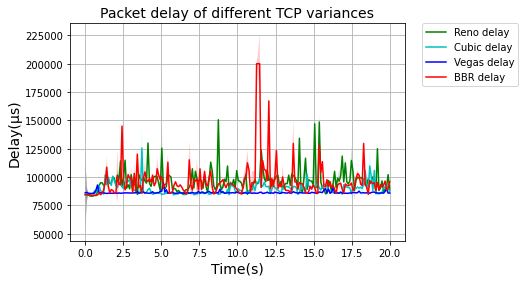

In [7]:
import matplotlib.pyplot as plt
import numpy as np

time =  np.linspace(0,20,200)

plt.plot(time, rtt_reno, "g-", label = 'Reno delay')
plt.fill_between(time, np.array(rtt_reno) + np.array(var_reno) , np.array(rtt_reno) - np.array(var_reno) , facecolor='green', alpha =0.2)
plt.plot(time, rtt_cubic, "c-", label = 'Cubic delay')
plt.fill_between(time, np.array(rtt_cubic) + np.array(var_cubic) , np.array(rtt_cubic) - np.array(var_cubic) , facecolor='cyan', alpha =0.2)
plt.plot(time, rtt_vegas, "b-", label = 'Vegas delay')
plt.fill_between(time, np.array(rtt_vegas) + np.array(var_vegas) , np.array(rtt_vegas) - np.array(var_vegas) , facecolor='blue', alpha =0.2)
plt.plot(time, rtt_bbr, "r-", label = 'BBR delay')
plt.fill_between(time, np.array(rtt_bbr) + np.array(var_bbr) , np.array(rtt_bbr) - np.array(var_bbr) , facecolor='red', alpha =0.2)

plt.title('Packet delay of different TCP variances', fontsize=14)
plt.xlabel('Time(s)', fontsize=14)
plt.ylabel('Delay(μs)', fontsize=14)
plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), borderaxespad = 0.)
plt.grid(True)
plt.show()

**Cwnd changes**

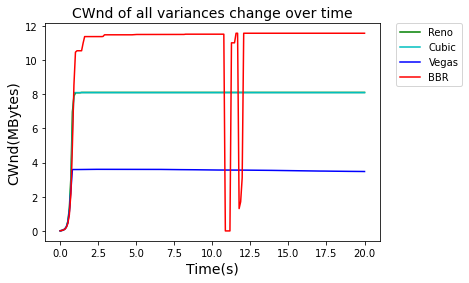

In [6]:
plt.plot(time, cwnd_reno, "g-", label = 'Reno')
plt.plot(time, cwnd_cubic, "c-", label = 'Cubic')
plt.plot(time, cwnd_vegas, "b-", label = 'Vegas')
plt.plot(time, cwnd_bbr, "r-", label = 'BBR')

plt.title('CWnd of all variances change over time', fontsize=14)
plt.xlabel('Time(s)', fontsize=14)
plt.ylabel('CWnd(MBytes)', fontsize=14)

plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0), borderaxespad = 0.)
#plt.grid(True)
plt.show()

**BBR delay and CWnd plot**

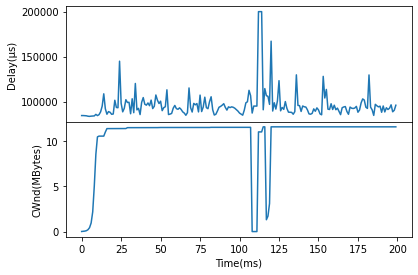

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4])
ax1.set_ylabel('Delay(μs)')
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
ax2.set_ylabel('CWnd(MBytes)')
ax2.set_xlabel('Time(ms)')
ax1.plot(rtt_bbr)
ax2.plot(cwnd_bbr)